Assignment 1A

In [3]:
from skimage import io, color, morphology, measure, filters, feature
import matplotlib.pyplot as plt 
from skimage.util import random_noise
import time
import numpy as np
import scipy.ndimage
from scipy.fftpack import fftn, ifftn
from skimage.filters import threshold_otsu
from skimage.morphology import binary_opening, binary_closing, square, rectangle, diamond, disk, remove_small_objects
from skimage.measure import regionprops, label
import matplotlib.patches as patches
from skimage.transform import hough_line, hough_line_peaks, hough_circle, hough_circle_peaks, probabilistic_hough_line
from skimage.draw import circle_perimeter

%matplotlib inline

1. (3 points) Read in the color image you have been provided. Display the image with an appropriate title.


(<matplotlib.image.AxesImage at 0x1fe68fdb830>,
 Text(0.5, 1.0, 'Teddy Bear'),
 (-0.5, 643.5, 479.5, -0.5))

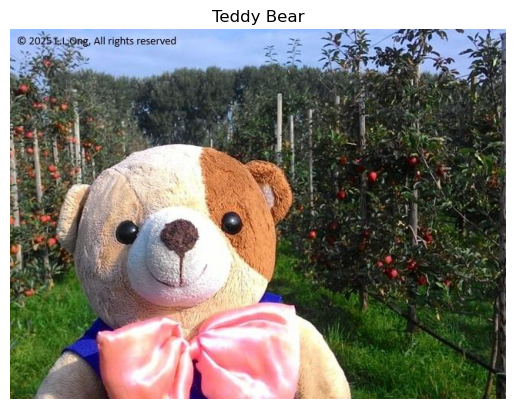

In [5]:
imgBear = io.imread("2148497_rgbimage.jpg") 
plt.imshow(imgBear), plt.title("Teddy Bear"), plt.axis("off")

2. (5 points) Convert the color image which you have been provided to grayscale. Display the image with
a gray colormap and an appropriate title.


(<matplotlib.image.AxesImage at 0x1fe6900dd30>,
 Text(0.5, 1.0, 'Greyscale Teddy Bear'),
 (-0.5, 643.5, 479.5, -0.5))

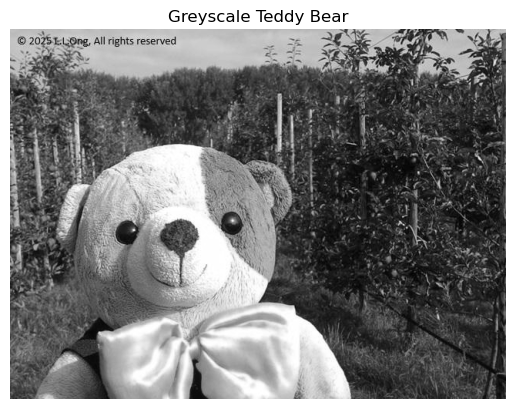

In [7]:
grey_bear = color.rgb2gray(imgBear)
plt.imshow(grey_bear, cmap="gray"), plt.title("Greyscale Teddy Bear"), plt.axis("off")

3. (2 points) Add 10% salt and pepper noise to the image.

(<matplotlib.image.AxesImage at 0x1fe6900deb0>,
 Text(0.5, 1.0, 'Teddy Bear with S&P noise'),
 (-0.5, 643.5, 479.5, -0.5))

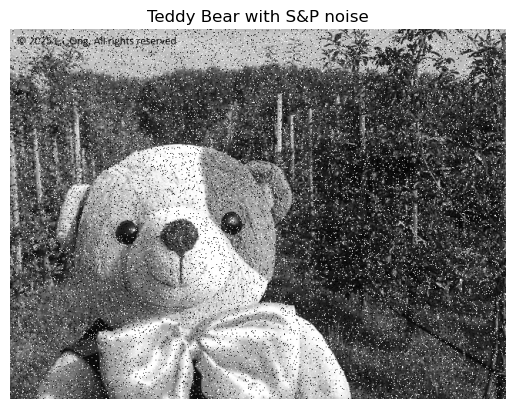

In [9]:
added_noisy_bear = random_noise(grey_bear, mode="s&p", amount = 0.1)
plt.imshow(added_noisy_bear, cmap="gray"), plt.title("Teddy Bear with S&P noise"), plt.axis("off")

4. (10 points) Compare the time taken to run Gaussian blur operations in the spatial domain vs the
frequency domain the following 7 values of ‘sigma‘ - 1,2,4,8,16,32 and 64. Plot the time taken vs sigma
for both spatial and frequency domain in the same plot. You can use the “time” module in Python.
Briefly comment on your plot. What happens to the kernel size when ‘sigma‘ is larger?. Which domain
is preferred for larger kernels?

Spatial times: [0.015, 0.021, 0.023, 0.095, 0.152, 0.163, 0.374]
Freq times: [0.062, 0.054, 0.061, 0.056, 0.057, 0.049, 0.048]


(Text(0.5, 0, 'Standard deviation'),
 Text(0, 0.5, 'Time (sec)'),
 Text(0.5, 1.0, 'Spatial/Freq domain comparison'))

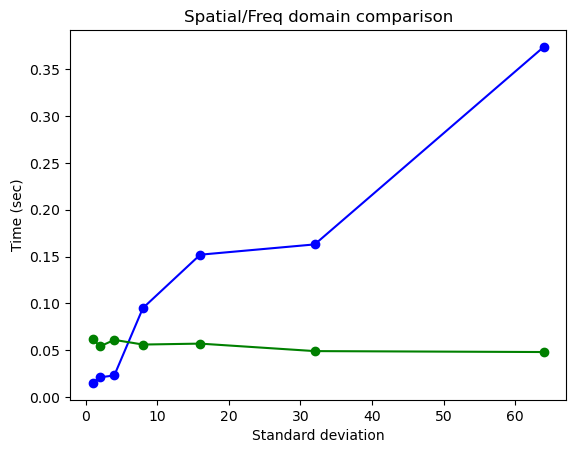

In [11]:
grey_bear_Ftransform = fftn(grey_bear)
sigma_values = [1, 2, 4, 8, 16, 32, 64]
times_spatial_dom=[]
times_freq_dom = []

for sigma in sigma_values:
    t_spatial = time.time()
    im_spatial_dom = scipy.ndimage.gaussian_filter(grey_bear, sigma=sigma) 
    times_spatial_dom.append(round(time.time()-t_spatial,3)) #issue with the rounding solved with AI

    t_freq = time.time()
    freqs_x = np.fft.fftfreq(grey_bear.shape[0])#freq bins for x and y axes
    freqs_y = np.fft.fftfreq(grey_bear.shape[1])
    freqs_xx, freqs_yy = np.outer(freqs_x, np.ones_like(freqs_y)), np.outer(np.ones_like(freqs_x), freqs_y)  #grid for freqs that matches the img shape
    
    kernel_freq = np.exp(-0.5 * (freqs_xx**2 + freqs_yy**2) / sigma**2)#AI helped me with the kernel, Eucliden distance from origin to point in freq space
    #-0.5 * (freqs_xx**2 + freqs_yy**2) / sigma**2 is the term of Gaussian distribution. np.exp()computes the exponential of the term inside parentheses, giving the smoothing effect in the frequency domain.  
    grey_bear_Ftransform_filtered = grey_bear_Ftransform * kernel_freq #applying the filter
    im_freq_dom = np.abs(ifftn(grey_bear_Ftransform_filtered))
    times_freq_dom.append(round(time.time()-t_freq,3))

print("Spatial times:", times_spatial_dom) 
print("Freq times:", times_freq_dom)

plt.plot(sigma_values, times_spatial_dom, label= "Spatial domain", marker= "o", color = "blue")
plt.plot(sigma_values, times_freq_dom, label="Frequency domain", marker = "o", color = "green")

plt.xlabel("Standard deviation"), plt.ylabel("Time (sec)"), plt.title("Spatial/Freq domain comparison")
#For lower level of sigma, spatial domain performs better. When kernel becomes larger, the frequency domain proves to be more efficient"

1B

1. (5 points) Convert the image to HSV. Separate the Hue, Saturation and Value channels. Display the
three channels separately in subplots with the corresponding intensity histograms.


(Text(0.5, 0, 'Value intensity'),
 Text(0, 0.5, 'number of pixels'),
 Text(0.5, 1.0, 'Value histogram'))

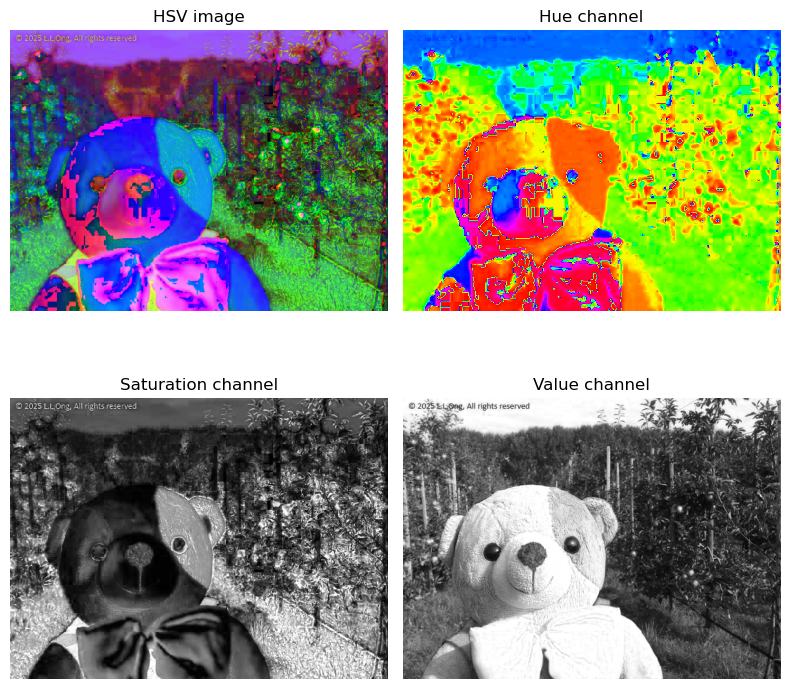

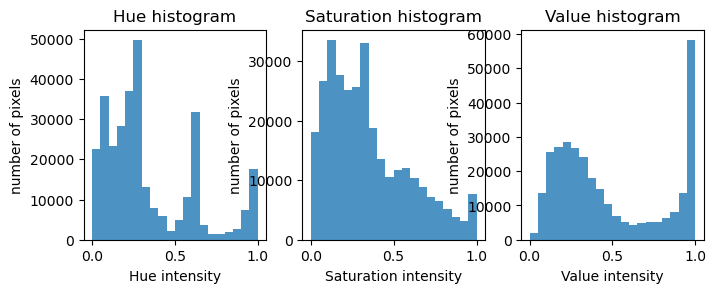

In [13]:
bearhsv = color.rgb2hsv(imgBear)
    
plt.figure(figsize =(8,8))
plt.subplot(2,2,1), plt.imshow(bearhsv), plt.title("HSV image"),plt.axis("off")
plt.subplot(2,2,2), plt.imshow(bearhsv[:,:,0], cmap= "hsv"), plt.title("Hue channel"), plt.axis("off")
plt.subplot(2,2,3), plt.imshow(bearhsv[:,:,1], cmap= "gray"), plt.title("Saturation channel"), plt.axis("off")
plt.subplot(2,2,4), plt.imshow(bearhsv[:,:,2], cmap= "gray"), plt.title("Value channel"), plt.axis("off")
plt.tight_layout()
   
plt.figure(figsize=(8,6))
plt.subplot(2,3,1),plt.hist(bearhsv[:,:,0].ravel(), bins = 20, alpha = 0.8)
plt.xlabel("Hue intensity"), plt.ylabel("number of pixels"), plt.title("Hue histogram")

plt.subplot(2,3,2),plt.hist(bearhsv[:,:,1].ravel(), bins = 20, alpha = 0.8)
plt.xlabel("Saturation intensity"), plt.ylabel("number of pixels"), plt.title("Saturation histogram")

plt.subplot(2,3,3),plt.hist(bearhsv[:,:,2].ravel(), bins = 20, alpha = 0.8)
plt.xlabel("Value intensity"), plt.ylabel("number of pixels"), plt.title("Value histogram")
   

2. (10 points) Segment the teddy bear in the image to obtain a binary image where pixels representing
the teddy bear (including his blue shirt and pink ribbon) are set to 1. Hint, you can segment the teddy
bear, his pink ribbon and blue shirt separately and combine the results. Show the results for each step
you took. Points breakdown: Full (10) points if your method successfully segments the teddy bear
with none of the background. If the shapes are slightly distorted or more than 10% of the background is
segmented, you will get a maximum of 7 points. If you make an attempt and the results are poor, you
can get a maximum of 5 points

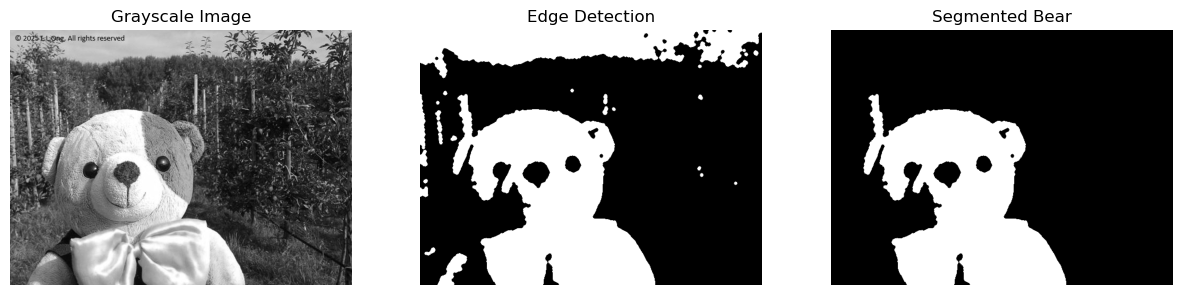

(<Axes: title={'center': 'Bear after bin. closing'}>,
 (-0.5, 643.5, 479.5, -0.5),
 Text(0.5, 1.0, 'Bear after bin. closing'))

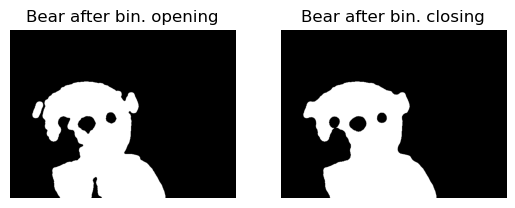

In [15]:
edge_bear = filters.sobel(grey_bear)
    
threshold_value = threshold_otsu(grey_bear)
binary_bear = grey_bear > threshold_value  

# to clean up segmentation
binary_bear = morphology.binary_closing(binary_bear, morphology.disk(3))
binary_bear = morphology.binary_opening(binary_bear, morphology.disk(3))

labels = measure.label(binary_bear) #keep the largest part(bear)
seg_bear = labels == np.argmax(np.bincount(labels.flat)[1:]) +1 #AI helped me with this formula to keep the labelled parts
#flat change the label into array, bincount counts how many times a label occurs and [:1] avoid the background, argmax keeps the biggest labelled +1 becasue it was sliced

plt.figure(figsize=(15, 8))
plt.subplot(131), plt.imshow(grey_bear, cmap='gray'), plt.axis('off'), plt.title('Grayscale Image')
plt.subplot(132), plt.imshow(binary_bear, cmap='gray'), plt.axis('off'), plt.title('Edge Detection')
plt.subplot(133), plt.imshow(seg_bear, cmap='gray'), plt.axis('off'), plt.title('Segmented Bear')
plt.show()

se1=disk(10)
binary_bear_opening = binary_opening(seg_bear,se1)
se2= disk(13)
binary_bear_closing = binary_closing(binary_bear_opening,se2)

plt.figure()
plt.subplot(1,2,1),plt.imshow(binary_bear_opening, cmap="gray"),plt.axis("off"), plt.title("Bear after bin. opening")
plt.subplot(1,2,2),plt.imshow(binary_bear_closing, cmap="gray"), plt.axis("off"), plt.title("Bear after bin. closing")

3. (5 points) Show your original image with an overlay of the bounding box of teddy bear’s head.

(Text(0.5, 1.0, 'Bounding Box around segmented Teddy Bear'),
 (-0.5, 643.5, 479.5, -0.5))

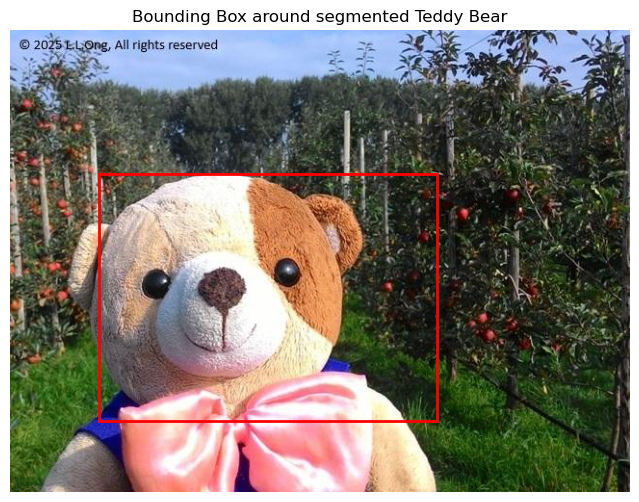

In [17]:
labeled_bear = label(binary_bear_opening)  
props = regionprops(labeled_bear) #measurements of each region

bear_bbox = props[0].bbox #bounding box of the first region(bear)


head_min_row = bear_bbox[0]  #top
head_min_col = bear_bbox[1]  #left
head_max_row = bear_bbox[2] - (bear_bbox[0]//2) #bottom - half top
head_max_col = bear_bbox[3]  # right

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(imgBear)

bear_box = patches.Rectangle(
    (head_min_col, head_min_row),  
    head_max_col - head_min_col,   
    head_max_row - head_min_row,   
    edgecolor='red',
    linewidth=2,
    facecolor='none'
)
ax.add_patch(bear_box)

plt.title("Bounding Box around segmented Teddy Bear"), plt.axis("off")

4. (5 points) Show your original image with an overlay of bounding boxes or circular boundaries of each
the teddy bear’s eyes. You can use the segmentation results (from Q1B.2) or the original image. Display
the resulting images with appropriate titles. Print the area and centroid of each eye.

(Text(0.5, 1.0, 'Detected eyes '), (-0.5, 643.5, 479.5, -0.5))

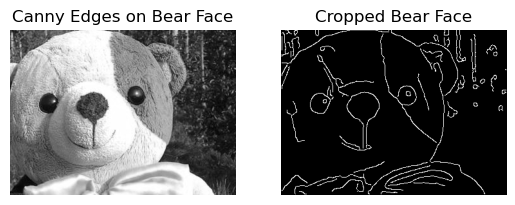

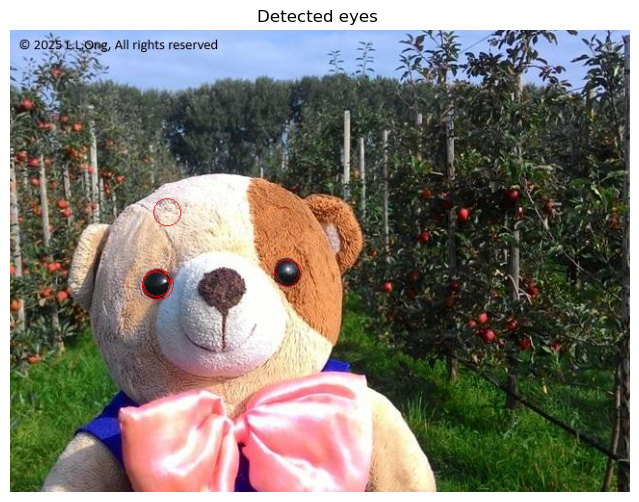

In [19]:
bear_face = grey_bear[head_min_row:head_max_row, head_min_col:head_max_col]

edges_face = feature.canny(bear_face, sigma=2, low_threshold=0.1, high_threshold=0.3)#high sigma> less edges more blur, high threshold > less edges

hough_radii = np.arange(10, 30, 2)  #possible range where are circles(eyes), step 2
hough_res = hough_circle(edges_face, hough_radii)

accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=5) # with just 2 total peaks I don't get the right eye

plt.figure()
plt.subplot(221), plt.imshow(bear_face, cmap='gray'),plt.title("Canny Edges on Bear Face"), plt.axis("off")
plt.subplot(222), plt.imshow(edges_face, cmap='gray'), plt.title("Cropped Bear Face"), plt.axis("off")

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(imgBear, cmap='gray')


cx_global = cx + head_min_col #here AI helped me to adjust the face mask
cy_global = cy + head_min_row #here AI helped me to adjust the face mask

for center_y, center_x, radius in zip(cy_global, cx_global, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius, shape=imgBear.shape)
    imgBear[circy, circx] = (220, 20, 20)  

plt.imshow(imgBear)
plt.title("Detected eyes "), plt.axis("off")

